In [1]:
import pandas as pd
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt  # 그래프 그리는 라이브러리
from sklearn.model_selection import train_test_split
from sklearn import metrics  # 평가를 위한 라이브러리
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import seaborn as sns  # 시각화 라이브러리

In [38]:
nc = pd.read_csv('data/NC다이노스.csv')
ds = pd.read_csv('data/두산베어스.csv')
kt = pd.read_csv('data/KT위즈.csv')
lg = pd.read_csv('data/LG트윈스.csv')
kia = pd.read_csv('data/KIA타이거즈.csv')
lotte = pd.read_csv('data/롯데자이언츠.csv')
samsung = pd.read_csv('data/삼성라이온즈.csv')
sk = pd.read_csv('data/SK와이번스.csv')
한화 = pd.read_csv('data/한화이글스.csv')
키움 = pd.read_csv('data/키움히어로즈.csv')


In [39]:
bins = [5,11,16,21,26,31,36,41]  # 구간 만들기
labels = ['5~10', '10~15', '15~20', '20~25', '25~30', '30~35', '35~40']
nc['temp'] = pd.cut(nc['temp'], bins = bins, labels = labels)
ds['temp'] = pd.cut(ds['temp'], bins = bins, labels = labels)
kt['temp'] = pd.cut(kt['temp'], bins = bins, labels = labels)
lg['temp'] = pd.cut(lg['temp'], bins = bins, labels = labels)
kia['temp'] = pd.cut(kia['temp'], bins = bins, labels = labels)
lotte['temp'] = pd.cut(lotte['temp'], bins = bins, labels = labels)
samsung['temp'] = pd.cut(samsung['temp'], bins = bins, labels = labels)
sk['temp'] = pd.cut(sk['temp'], bins = bins, labels = labels)
한화['temp'] = pd.cut(한화['temp'], bins = bins, labels = labels)
키움['temp'] = pd.cut(키움['temp'], bins = bins, labels = labels)

In [47]:
test_result = nc[['temp', 'team_text', 'result_text', 'day_text']].groupby(['temp', 'team_text','result_text']).count()
test_result

day_text
temp  team_text result_text          
5~10  NC 다이노스   0                14.0
                1                 7.0
10~15 NC 다이노스   0                42.0
                1                35.0
15~20 NC 다이노스   0                85.0
                1               111.0
20~25 NC 다이노스   0               196.0
                1               186.0
25~30 NC 다이노스   0                96.0
                1               126.0
30~35 NC 다이노스   0                36.0
                1                33.0
35~40 NC 다이노스   0                 NaN
                1                 NaN

In [43]:
test_result = ds[['temp', 'team_text', 'result_text', 'day_text']].groupby(['temp', 'team_text','result_text']).count()
test_result

day_text
temp  team_text result_text          
5~10  두산 베어스    0                14.0
                1                21.0
10~15 두산 베어스    0                32.0
                1                41.0
15~20 두산 베어스    0                82.0
                1               117.0
20~25 두산 베어스    0               147.0
                1               224.0
25~30 두산 베어스    0               174.0
                1               193.0
30~35 두산 베어스    0                24.0
                1                46.0
35~40 두산 베어스    0                 NaN
                1                 4.0

In [6]:
test_result = kt[['temp', 'team_text', 'result_text', 'location']].groupby(['temp', 'team_text','result_text']).count()
test_result

location
temp  team_text result_text          
5~10  kt wiz    0                13.0
                1                 7.0
10~15 kt wiz    0                27.0
                1                19.0
15~20 kt wiz    0                72.0
                1                46.0
20~25 kt wiz    0               156.0
                1                97.0
25~30 kt wiz    0               112.0
                1                93.0
30~35 kt wiz    0                33.0
                1                16.0
35~40 kt wiz    0                 2.0
                1                 NaN

In [7]:
test_result = lg[['temp', 'team_text', 'result_text', 'location']].groupby(['temp', 'team_text','result_text']).count()
test_result

location
temp  team_text result_text          
5~10  LG 트윈스    0                 9.0
                1                 9.0
10~15 LG 트윈스    0                40.0
                1                39.0
15~20 LG 트윈스    0               113.0
                1                94.0
20~25 LG 트윈스    0               176.0
                1               176.0
25~30 LG 트윈스    0               168.0
                1               185.0
30~35 LG 트윈스    0                44.0
                1                42.0
35~40 LG 트윈스    0                 2.0
                1                 NaN

In [8]:
test_result = kia[['temp', 'team_text', 'result_text', 'location']].groupby(['temp', 'team_text','result_text']).count()
test_result

location
temp  team_text result_text          
5~10  KIA 타이거즈  0                14.0
                1                14.0
10~15 KIA 타이거즈  0                25.0
                1                32.0
15~20 KIA 타이거즈  0                97.0
                1                84.0
20~25 KIA 타이거즈  0               208.0
                1               176.0
25~30 KIA 타이거즈  0               183.0
                1               163.0
30~35 KIA 타이거즈  0                39.0
                1                47.0
35~40 KIA 타이거즈  0                 NaN
                1                 NaN

In [9]:
test_result = lotte[['temp', 'team_text', 'result_text', 'location']].groupby(['temp', 'team_text','result_text']).count()
test_result

location
temp  team_text result_text          
5~10  롯데 자이언츠   0                12.0
                1                12.0
10~15 롯데 자이언츠   0                41.0
                1                38.0
15~20 롯데 자이언츠   0               113.0
                1               115.0
20~25 롯데 자이언츠   0               217.0
                1               196.0
25~30 롯데 자이언츠   0               160.0
                1               125.0
30~35 롯데 자이언츠   0                21.0
                1                29.0
35~40 롯데 자이언츠   0                 NaN
                1                 NaN

In [10]:
test_result = samsung[['temp', 'team_text', 'result_text', 'location']].groupby(['temp', 'team_text','result_text']).count()
test_result

location
temp  team_text result_text          
5~10  삼성 라이온즈   0                10.0
                1                 9.0
10~15 삼성 라이온즈   0                37.0
                1                31.0
15~20 삼성 라이온즈   0                84.0
                1                87.0
20~25 삼성 라이온즈   0               161.0
                1               195.0
25~30 삼성 라이온즈   0               170.0
                1               182.0
30~35 삼성 라이온즈   0                51.0
                1                61.0
35~40 삼성 라이온즈   0                 2.0
                1                 NaN

In [11]:
test_result = sk[['temp', 'team_text', 'result_text', 'location']].groupby(['temp', 'team_text','result_text']).count()
test_result

location
temp  team_text result_text          
5~10  SK 와이번스   0                17.0
                1                34.0
10~15 SK 와이번스   0                43.0
                1                51.0
15~20 SK 와이번스   0                86.0
                1                90.0
20~25 SK 와이번스   0               197.0
                1               209.0
25~30 SK 와이번스   0               145.0
                1               150.0
30~35 SK 와이번스   0                36.0
                1                33.0
35~40 SK 와이번스   0                 NaN
                1                 NaN

In [12]:
test_result = 한화[['temp', 'team_text', 'result_text', 'location']].groupby(['temp', 'team_text','result_text']).count()
test_result

location
temp  team_text result_text          
5~10  한화 이글스    0                20.0
                1                 6.0
10~15 한화 이글스    0                33.0
                1                23.0
15~20 한화 이글스    0                92.0
                1                79.0
20~25 한화 이글스    0               202.0
                1               161.0
25~30 한화 이글스    0               207.0
                1               158.0
30~35 한화 이글스    0                59.0
                1                38.0
35~40 한화 이글스    0                 NaN
                1                 2.0

In [13]:
test_result = 키움[['temp', 'team_text', 'result_text', 'location']].groupby(['temp', 'team_text','result_text']).count()
test_result

location
temp  team_text result_text          
5~10  키움 히어로즈   0                13.0
                1                17.0
10~15 키움 히어로즈   0                31.0
                1                42.0
15~20 키움 히어로즈   0                97.0
                1                98.0
20~25 키움 히어로즈   0               163.0
                1               203.0
25~30 키움 히어로즈   0               157.0
                1               197.0
30~35 키움 히어로즈   0                47.0
                1                45.0
35~40 키움 히어로즈   0                 NaN
                1                 NaN

<AxesSubplot:xlabel='location', ylabel='count'>

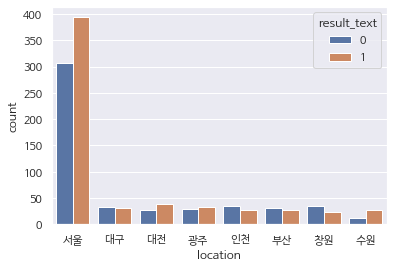

In [14]:
import seaborn as sns  # 시각화 라이브러리
sns.set(font="Hancom Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
sns.countplot(data = 키움, x = 'location', hue='result_text')

<AxesSubplot:xlabel='location', ylabel='count'>

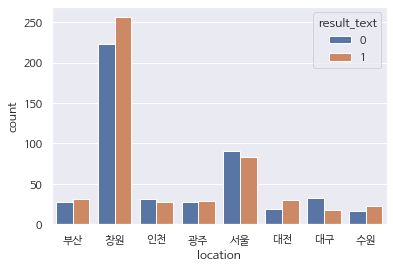

In [15]:
sns.countplot(data = nc, x = 'location', hue='result_text')

In [16]:
bins = [1,6,11,16,21,26,31]  # 구간 만들기
labels = ['1-5', '5-10', '10-15', '15-20', '20-25', '25-30']
nc['H_text'] = pd.cut(nc['H_text'], bins = bins, labels = labels)
ds['H_text'] = pd.cut(ds['H_text'], bins = bins, labels = labels)
kt['H_text'] = pd.cut(kt['H_text'], bins = bins, labels = labels)
lg['H_text'] = pd.cut(lg['H_text'], bins = bins, labels = labels)
kia['H_text'] = pd.cut(kia['H_text'], bins = bins, labels = labels)
lotte['H_text'] = pd.cut(lotte['H_text'], bins = bins, labels = labels)
samsung['H_text'] = pd.cut(samsung['H_text'], bins = bins, labels = labels)
sk['H_text'] = pd.cut(sk['H_text'], bins = bins, labels = labels)
한화['H_text'] = pd.cut(한화['H_text'], bins = bins, labels = labels)
키움['H_text'] = pd.cut(키움['H_text'], bins = bins, labels = labels)

<AxesSubplot:xlabel='H_text', ylabel='count'>

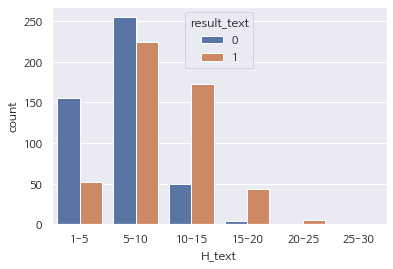

In [17]:
sns.countplot(data = nc, x = 'H_text', hue='result_text')

<AxesSubplot:xlabel='H_text', ylabel='count'>

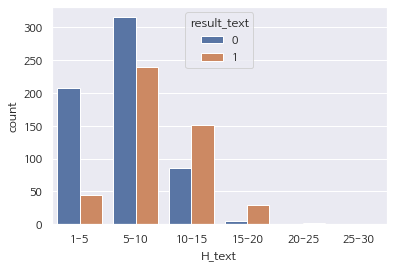

In [18]:
sns.countplot(data = 한화, x = 'H_text', hue='result_text')

<AxesSubplot:xlabel='H_text', ylabel='count'>

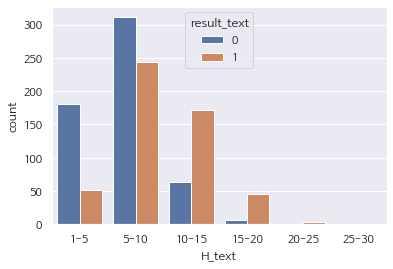

In [19]:
sns.countplot(data = kia, x = 'H_text', hue='result_text')

<AxesSubplot:xlabel='DU_text', ylabel='count'>

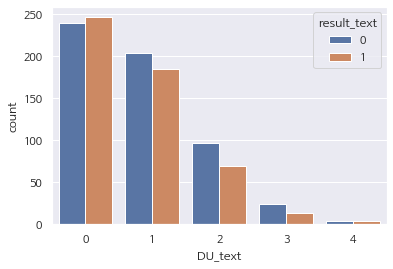

In [20]:
sns.countplot(data = kia, x = 'DU_text', hue='result_text')

<AxesSubplot:xlabel='DU_text', ylabel='count'>

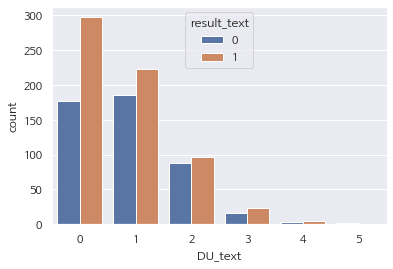

In [21]:
sns.countplot(data = ds, x = 'DU_text', hue='result_text')

<AxesSubplot:xlabel='ER_text', ylabel='count'>

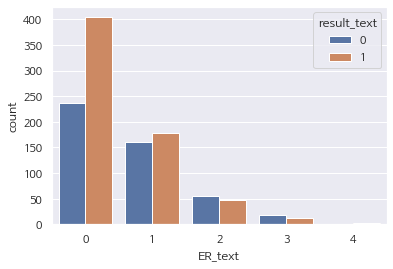

In [22]:
sns.countplot(data = ds, x = 'ER_text', hue='result_text')

In [23]:
bins = [0,21,41,61,81,101]  # 구간 만들기
labels = ['0-20', '20-40', '40-60', '60-80', '80-100']
nc['humidity'] = pd.cut(nc['humidity'], bins = bins, labels = labels)
ds['humidity'] = pd.cut(ds['humidity'], bins = bins, labels = labels)
kt['humidity'] = pd.cut(kt['humidity'], bins = bins, labels = labels)
lg['humidity'] = pd.cut(lg['humidity'], bins = bins, labels = labels)
kia['humidity'] = pd.cut(kia['humidity'], bins = bins, labels = labels)
lotte['humidity'] = pd.cut(lotte['humidity'], bins = bins, labels = labels)
samsung['humidity'] = pd.cut(samsung['humidity'], bins = bins, labels = labels)
sk['humidity'] = pd.cut(sk['humidity'], bins = bins, labels = labels)
한화['humidity'] = pd.cut(한화['humidity'], bins = bins, labels = labels)
키움['humidity'] = pd.cut(키움['humidity'], bins = bins, labels = labels)

<AxesSubplot:xlabel='humidity', ylabel='count'>

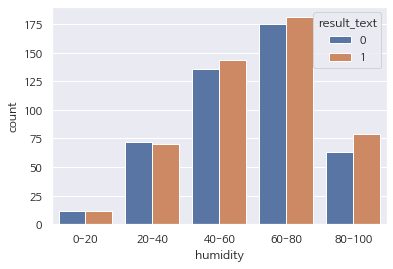

In [24]:
sns.countplot(data = nc, x = 'humidity', hue='result_text')

<AxesSubplot:xlabel='humidity', ylabel='count'>

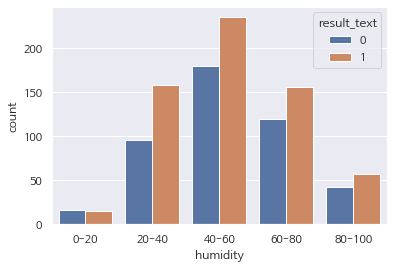

In [25]:
sns.countplot(data = ds, x = 'humidity', hue='result_text')

<AxesSubplot:xlabel='humidity', ylabel='count'>

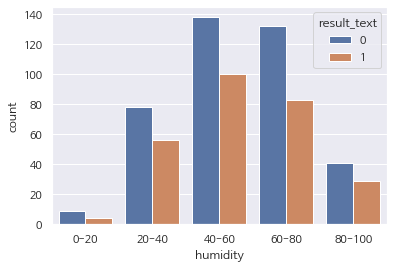

In [26]:
sns.countplot(data = kt, x = 'humidity', hue='result_text')

In [27]:
test_result = lotte[['humidity', 'team_text', 'result_text', 'location']].groupby(['humidity', 'team_text','result_text']).count()
test_result

location
humidity team_text result_text          
0-20     롯데 자이언츠   0                   6
                   1                   7
20-40    롯데 자이언츠   0                  79
                   1                  61
40-60    롯데 자이언츠   0                 173
                   1                 146
60-80    롯데 자이언츠   0                 209
                   1                 217
80-100   롯데 자이언츠   0                  75
                   1                  63